<p style="background-color:#FFF;font-family:newtimeroman;color:#000000;font-size:250%;font-weight:bold;text-align:center;border-style: solid;border-radius:8px 8px;border-color:#000000;border-width: 2px;"> PREDICTIVE MODELING OF DIAMOND PRICES 💎📊</p>

<div style="background-color:#FFF; border-radius:8px; border:#000000 solid; padding: 15px; font-size:100%; text-align:center;border-width: 2px;">
    <img src="https://media.tenor.com/sjjDq0y5F5UAAAAd/ethplode-ethplo.gif" alt="Animated GIF">
</div>

<p style="background-color:#FFF;font-family:newtimeroman;color:#000000;font-size:150%;font-weight:bold;text-align:center;border-style: solid;border-radius:8px 8px;border-color:#000000;border-width: 2px;"> IMPORT DEPENDENCIES</p>

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import warnings

from sklearn.preprocessing   import (
    LabelEncoder,
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    QuantileTransformer,
    PowerTransformer
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import (
    LinearRegression,
    Ridge,
    Lasso
)
from sklearn.tree           import DecisionTreeRegressor
from sklearn.ensemble       import RandomForestRegressor
from sklearn.metrics        import (
    mean_squared_error,
    r2_score,
    mean_squared_log_error
)

from sklearn.pipeline       import Pipeline
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv("/kaggle/input/diamonds/diamonds.csv")
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<p style="background-color:#FFF;font-family:newtimeroman;color:#000000;font-size:150%;font-weight:bold;text-align:center;border-style: solid;border-radius:8px 8px;border-color:#000000;border-width: 2px;">DATA PRE-PROCESSING AND EDA</p>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53940.0,26970.500000,15571.281097,1.0,13485.75,26970.50,40455.25,53940.00
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [5]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [6]:
data.drop(["Unnamed: 0"], axis=1,inplace=True)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
object_cols = data.select_dtypes(include='object').columns.tolist()
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


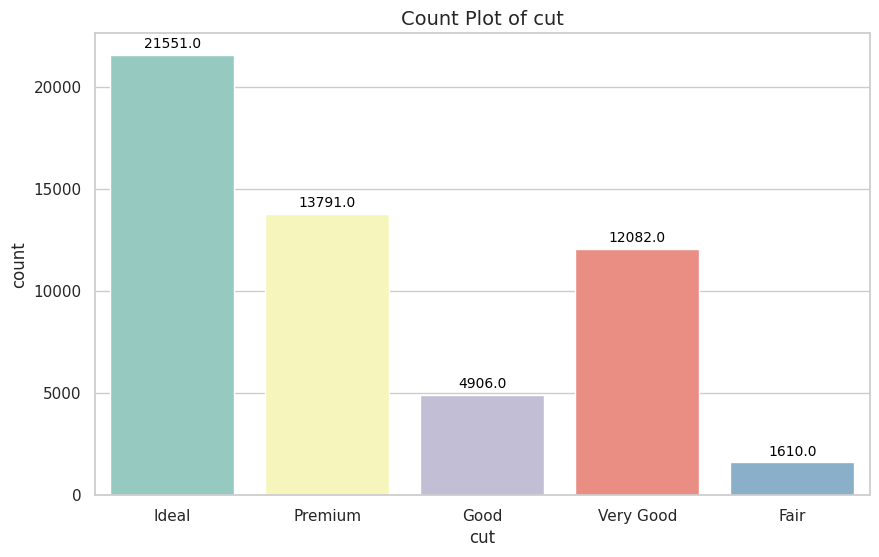

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64
-------------------------


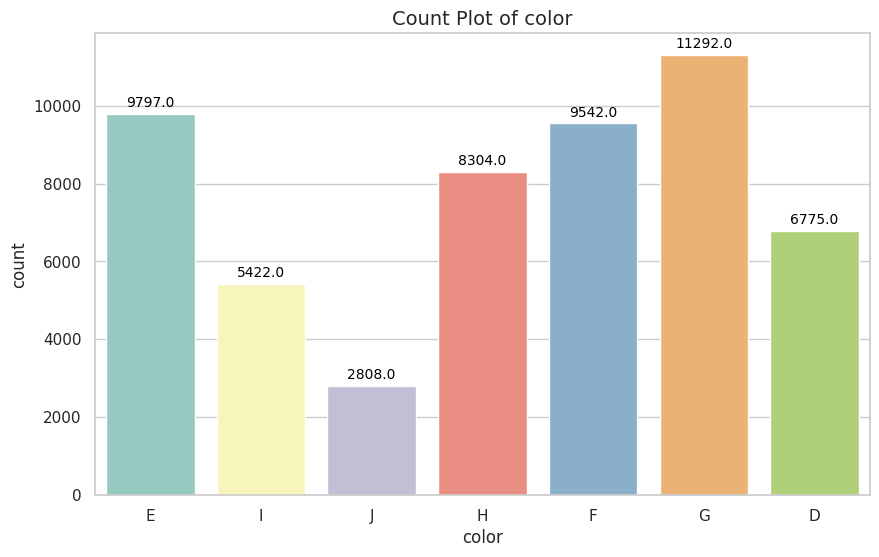

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64
-------------------------


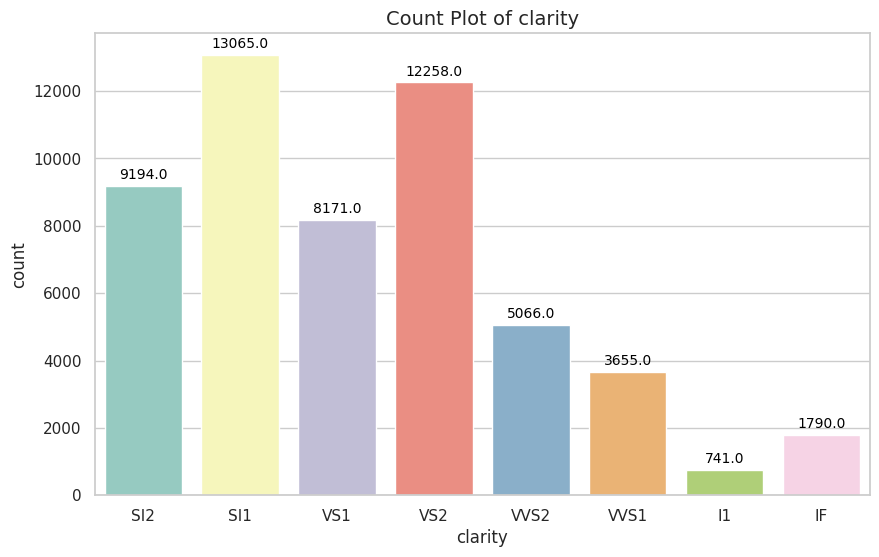

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64
-------------------------


In [8]:
for c in object_cols:
    plt.figure(figsize=(10, 6))
    
    sns.set(style="whitegrid")
    ax = sns.countplot(x=data[c], palette="Set3")
    
    # Add count annotations on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.title(f'Count Plot of {c}', fontsize=14)
    plt.show()
    
    print(data[c].value_counts())
    print("-" * 25)

In [9]:
label_encoder = LabelEncoder()
for col in object_cols:
    data[col] = label_encoder.fit_transform(data[col])
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


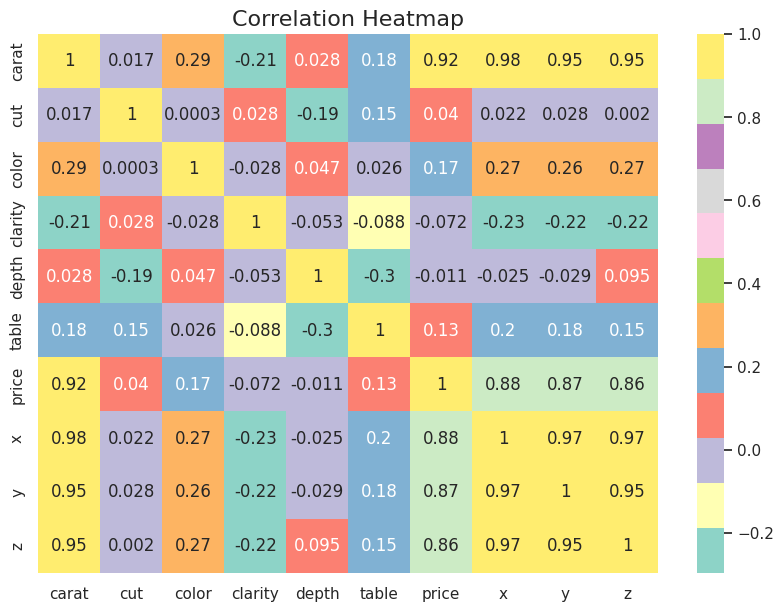

In [10]:
plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True, cmap="Set3")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [11]:
data.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.017124,0.291437,-0.214290,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,0.017124,1.000000,0.000304,0.028235,-0.194249,0.150327,0.039860,0.022342,0.027572,0.002037
color,0.291437,0.000304,1.000000,-0.027795,0.047279,0.026465,0.172511,0.270287,0.263584,0.268227
clarity,-0.214290,0.028235,-0.027795,1.000000,-0.053080,-0.088223,-0.071535,-0.225721,-0.217616,-0.224263
depth,0.028224,-0.194249,0.047279,-0.053080,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,0.150327,0.026465,-0.088223,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,0.039860,0.172511,-0.071535,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,0.022342,0.270287,-0.225721,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,0.027572,0.263584,-0.217616,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.002037,0.268227,-0.224263,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Q1: 0.40 | Q2: 0.70 | Q3: 1.04



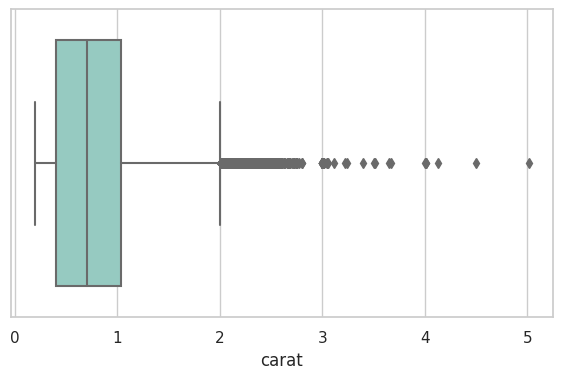

Q1: 2.00 | Q2: 2.00 | Q3: 3.00



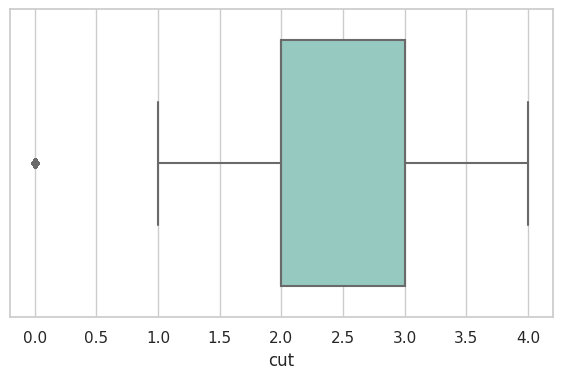

Q1: 1.00 | Q2: 3.00 | Q3: 4.00



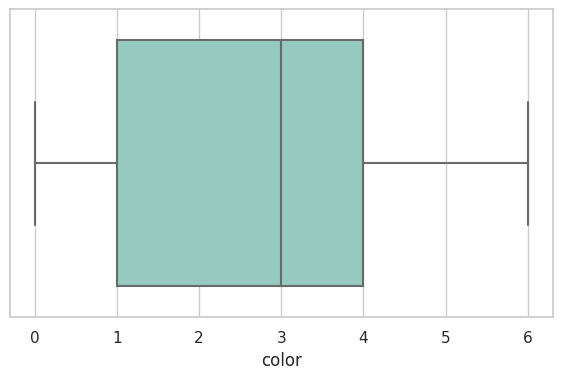

Q1: 2.00 | Q2: 4.00 | Q3: 5.00



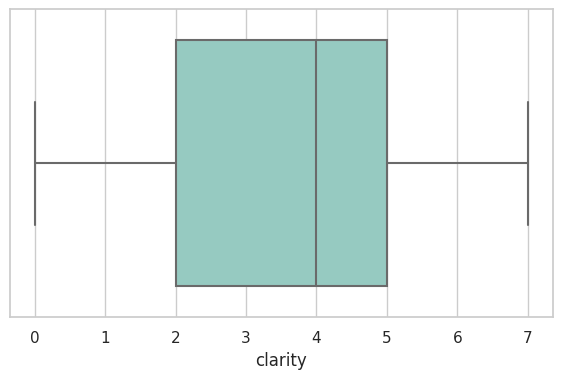

Q1: 61.00 | Q2: 61.80 | Q3: 62.50



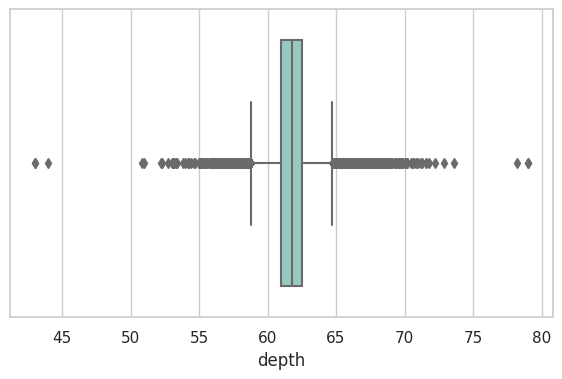

Q1: 56.00 | Q2: 57.00 | Q3: 59.00



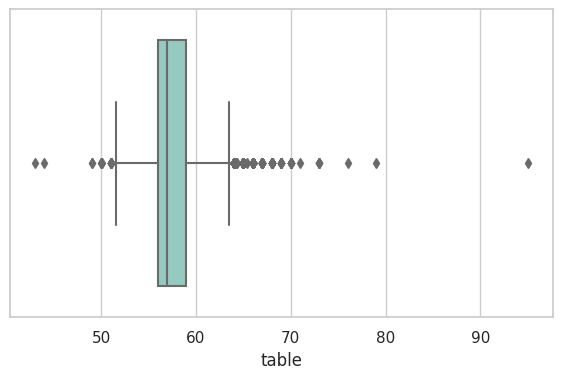

Q1: 950.00 | Q2: 2401.00 | Q3: 5324.25



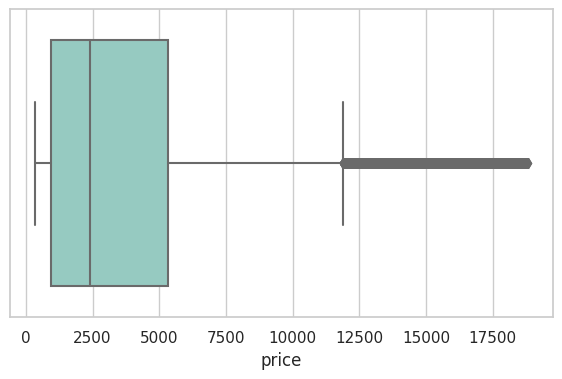

Q1: 4.71 | Q2: 5.70 | Q3: 6.54



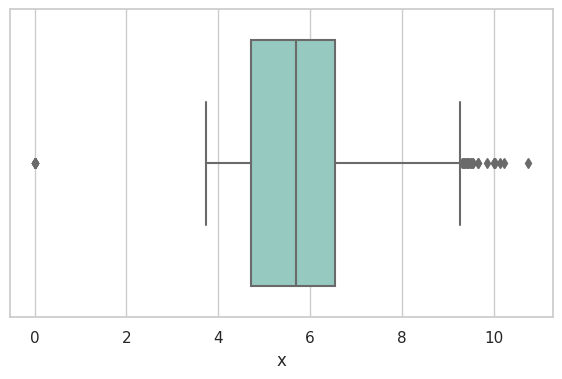

Q1: 4.72 | Q2: 5.71 | Q3: 6.54



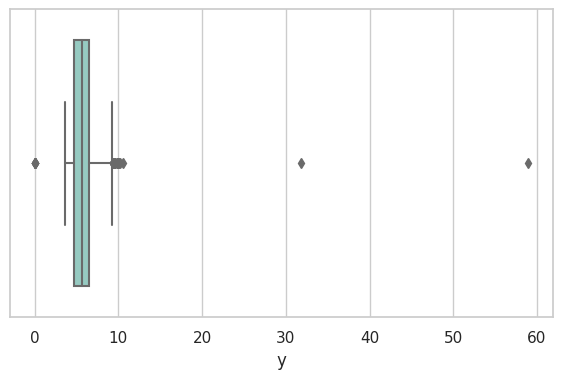

Q1: 2.91 | Q2: 3.53 | Q3: 4.04



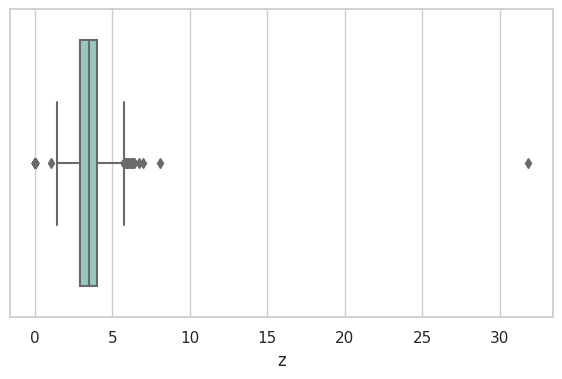

In [12]:
for i in data.columns:
    plt.figure(figsize=(7, 4))
    
    q1 = np.percentile(data[i], 25)
    q2 = np.percentile(data[i], 50)
    q3 = np.percentile(data[i], 75)
    
    print("Q1: {:.2f} | Q2: {:.2f} | Q3: {:.2f}\n".format(q1, q2, q3))
    
    sns.boxplot(x=data[i], palette="Set3", orient='v')
    plt.show()

In [13]:
def outlier_th(dataframe, col_name, q1, q3):
    q1 = dataframe[col_name].quantile(q1)
    q3 = dataframe[col_name].quantile(q3)
    iqr = q3 - q1
    low_limit = q1 - 1.5 * iqr
    up_limit  = q3 + 1.5 * iqr
    return low_limit, up_limit

In [14]:
for c in data.columns:
    low, up = outlier_th(data, c ,q1=0.25, q3=0.75)
    data = data[~((data[c] < low) | (data[c] > up))]

Q1: 0.37 | Q2: 0.59 | Q3: 1.01



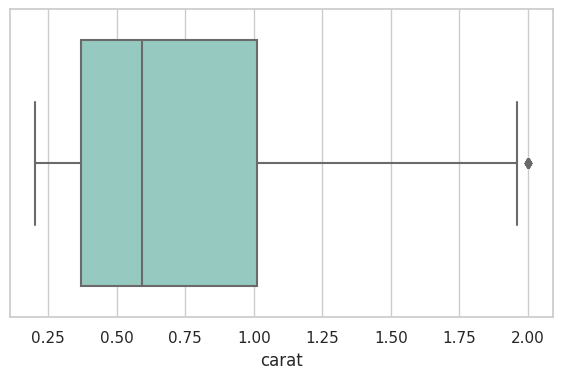

Q1: 2.00 | Q2: 2.00 | Q3: 3.00



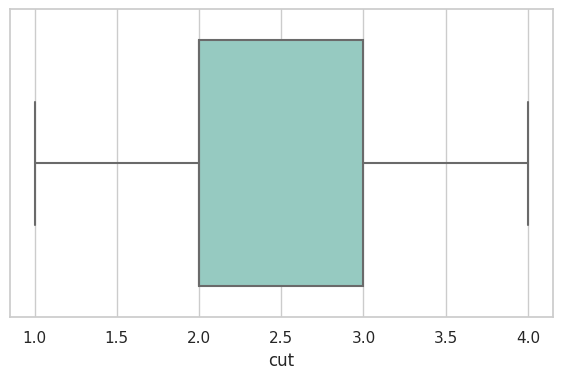

Q1: 1.00 | Q2: 3.00 | Q3: 4.00



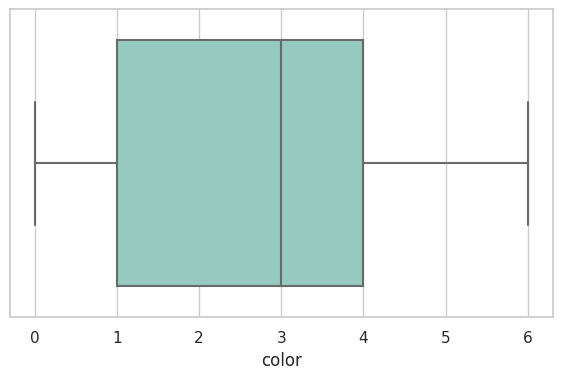

Q1: 2.00 | Q2: 4.00 | Q3: 5.00



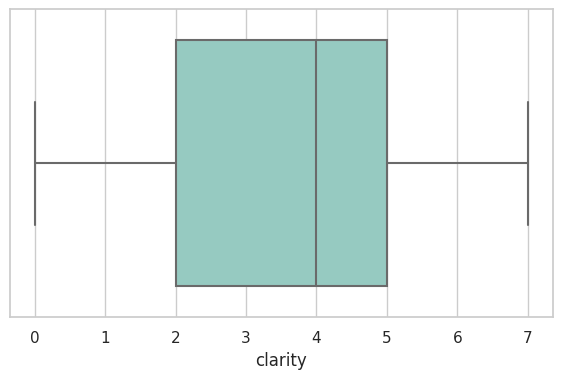

Q1: 61.10 | Q2: 61.90 | Q3: 62.50



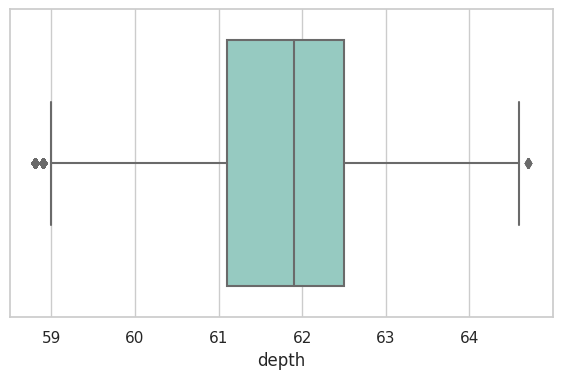

Q1: 56.00 | Q2: 57.00 | Q3: 59.00



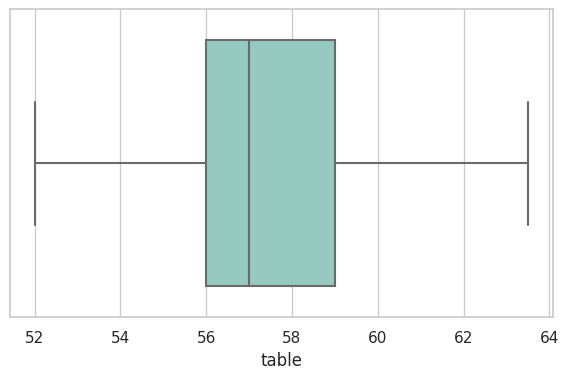

Q1: 879.00 | Q2: 1996.00 | Q3: 4523.00



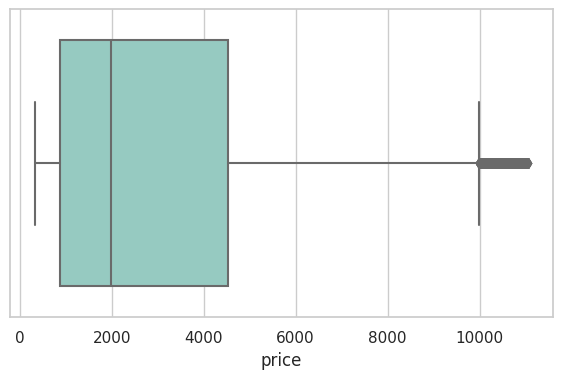

Q1: 4.62 | Q2: 5.39 | Q3: 6.39



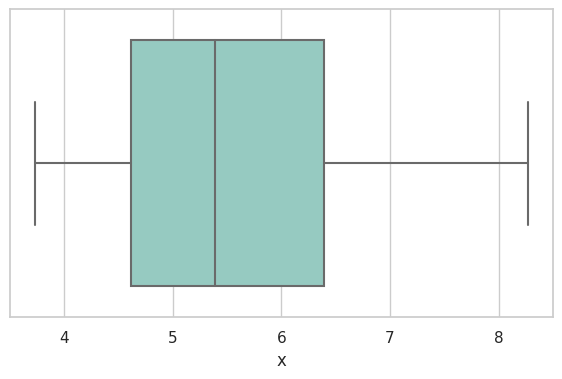

Q1: 4.63 | Q2: 5.40 | Q3: 6.39



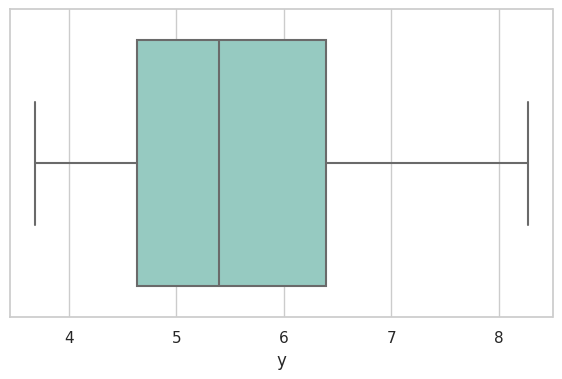

Q1: 2.84 | Q2: 3.32 | Q3: 3.96



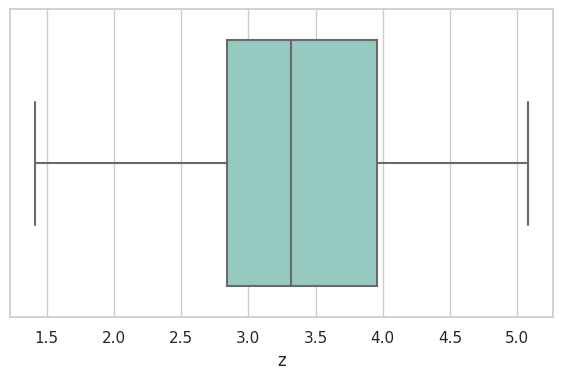

In [15]:
for i in data.columns:
    plt.figure(figsize=(7, 4))
    
    q1 = np.percentile(data[i], 25)
    q2 = np.percentile(data[i], 50)
    q3 = np.percentile(data[i], 75)
    
    print("Q1: {:.2f} | Q2: {:.2f} | Q3: {:.2f}\n".format(q1, q2, q3))
    
    sns.boxplot(x=data[i], palette="Set3", orient='v')
    plt.show()

In [16]:
data.shape

(46596, 10)

<p style="background-color:#FFF;font-family:newtimeroman;color:#000000;font-size:150%;font-weight:bold;text-align:center;border-style: solid;border-radius:8px 8px;border-color:#000000;border-width: 2px;">MODEL ENGINEERING</p>

In [17]:
X = data.drop("price", axis = "columns")
Y = data["price"]

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(34947, 9) (11649, 9) (34947,) (11649,)


In [19]:
regressors = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ("Decision Tree Regression", DecisionTreeRegressor()),
    ("Random Forest Regression", RandomForestRegressor())
]

scalers = [
    ("Standard Scaler", StandardScaler()),
    ("MinMax Scaler", MinMaxScaler()),
    ("Robust Scaler", RobustScaler()),
    ("Quantile Transformer", QuantileTransformer()),
    ("Power Transformer", PowerTransformer())
]

results = []

for regressor_name, regressor in regressors:
    for scaler_name, scaler in scalers:
        pipeline = Pipeline([
            ('scaler', scaler),
            ('regressor', regressor)
        ])
        pipeline.fit(X_train, Y_train)
        Y_pred = pipeline.predict(X_test)
        r2     = r2_score(Y_test, Y_pred)
        mse = mean_squared_error(Y_test, Y_pred)
        rmse = np.sqrt(mse)
        results.append({
            'Regressor': regressor_name,
            'Scaler': scaler_name,
            'R2': r2,
            'MSE': mse,
            'RMSE': rmse
        })
        print(f"******** {regressor_name} + {scaler_name} ********")

******** Linear Regression + Standard Scaler ********
******** Linear Regression + MinMax Scaler ********
******** Linear Regression + Robust Scaler ********
******** Linear Regression + Quantile Transformer ********
******** Linear Regression + Power Transformer ********
******** Ridge Regression + Standard Scaler ********
******** Ridge Regression + MinMax Scaler ********
******** Ridge Regression + Robust Scaler ********
******** Ridge Regression + Quantile Transformer ********
******** Ridge Regression + Power Transformer ********
******** Lasso Regression + Standard Scaler ********
******** Lasso Regression + MinMax Scaler ********
******** Lasso Regression + Robust Scaler ********
******** Lasso Regression + Quantile Transformer ********
******** Lasso Regression + Power Transformer ********
******** Decision Tree Regression + Standard Scaler ********
******** Decision Tree Regression + MinMax Scaler ********
******** Decision Tree Regression + Robust Scaler ********
******** Dec

In [20]:
results = pd.DataFrame(results)
results.head()

,Regressor,Scaler,R2,MSE,RMSE
0,Linear Regression,Standard Scaler,0.894529,7.136731e+05,844.791731
1,Linear Regression,MinMax Scaler,0.894529,7.136731e+05,844.791731
2,Linear Regression,Robust Scaler,0.894529,7.136731e+05,844.791731
3,Linear Regression,Quantile Transformer,0.790291,1.419006e+06,1191.220276
4,Linear Regression,Power Transformer,0.846816,1.036525e+06,1018.098876


==================== Linear Regression ====================
================================= R^2 =======================


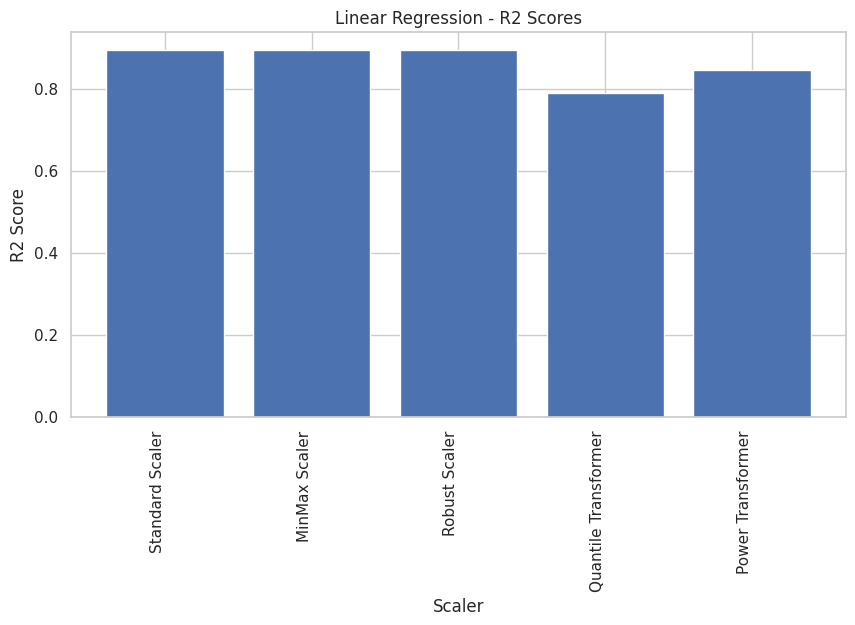

================================= MSE =======================


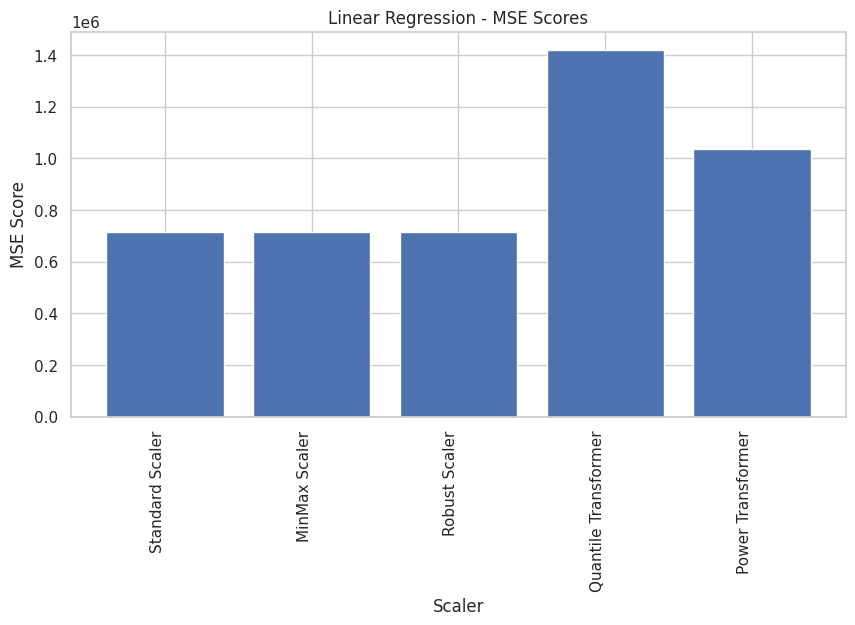

================================= RMSE =====================


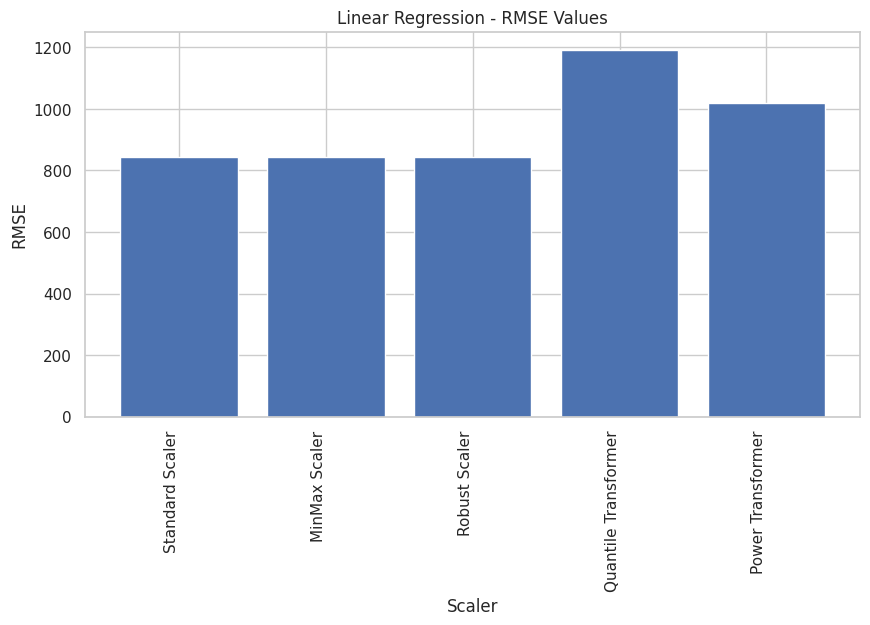

==================== Ridge Regression ====================
================================= R^2 =======================


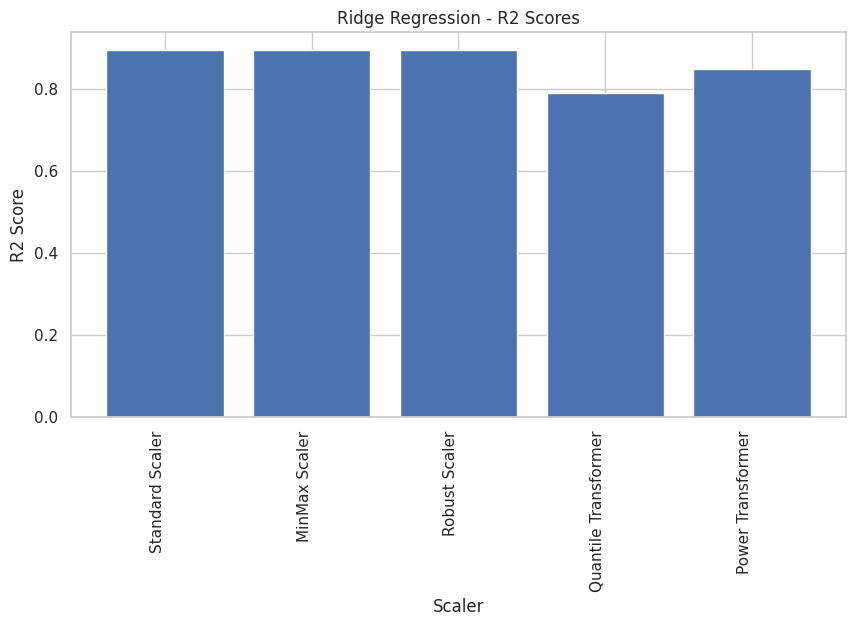

================================= MSE =======================


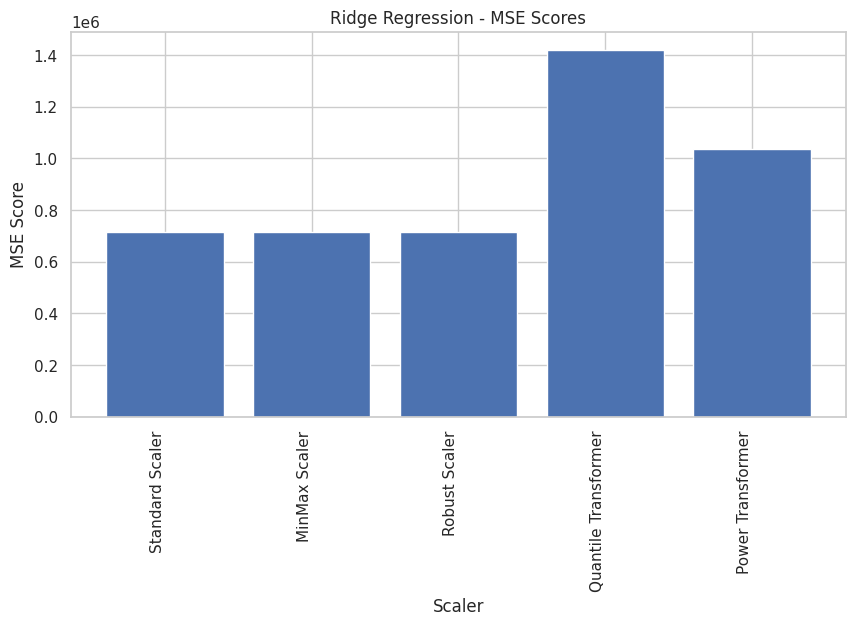

================================= RMSE =====================


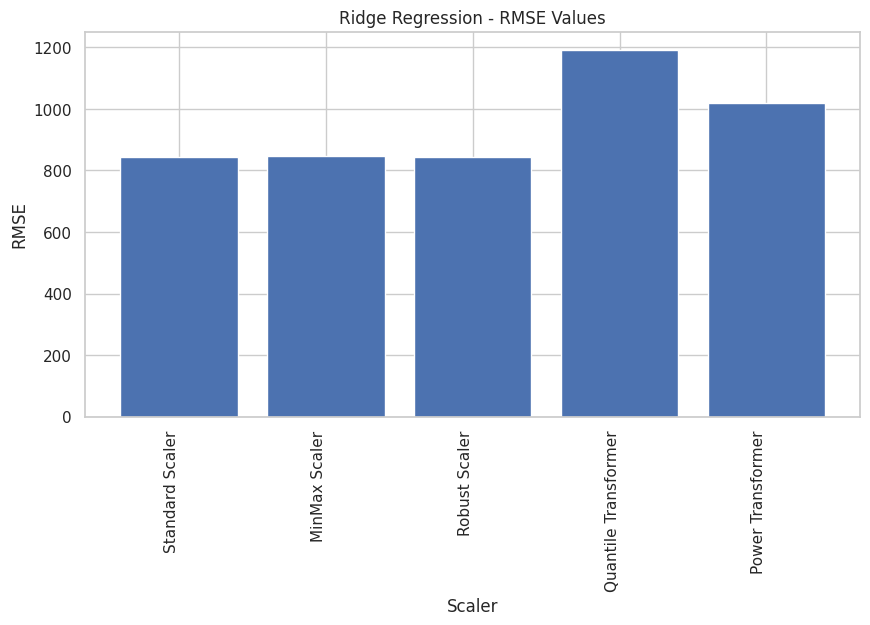

==================== Lasso Regression ====================
================================= R^2 =======================


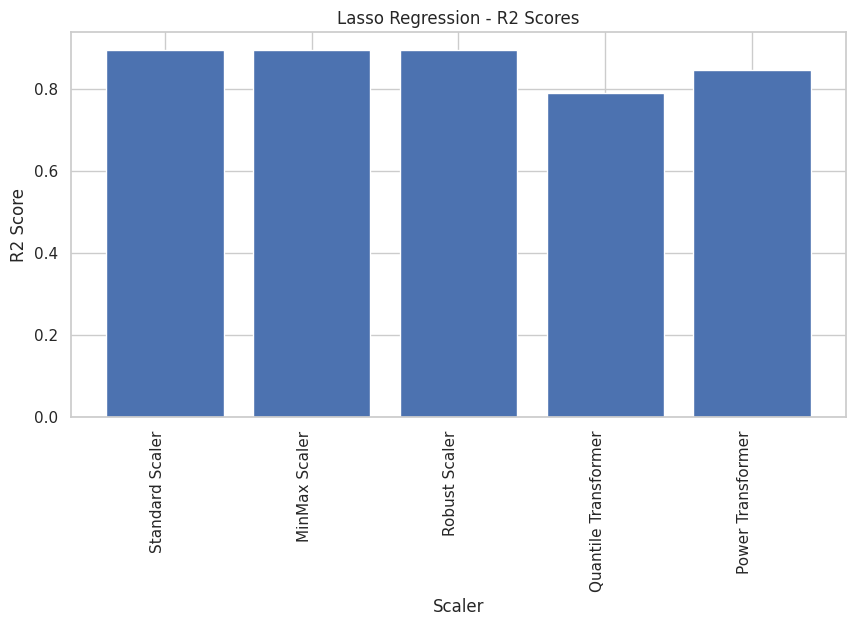

================================= MSE =======================


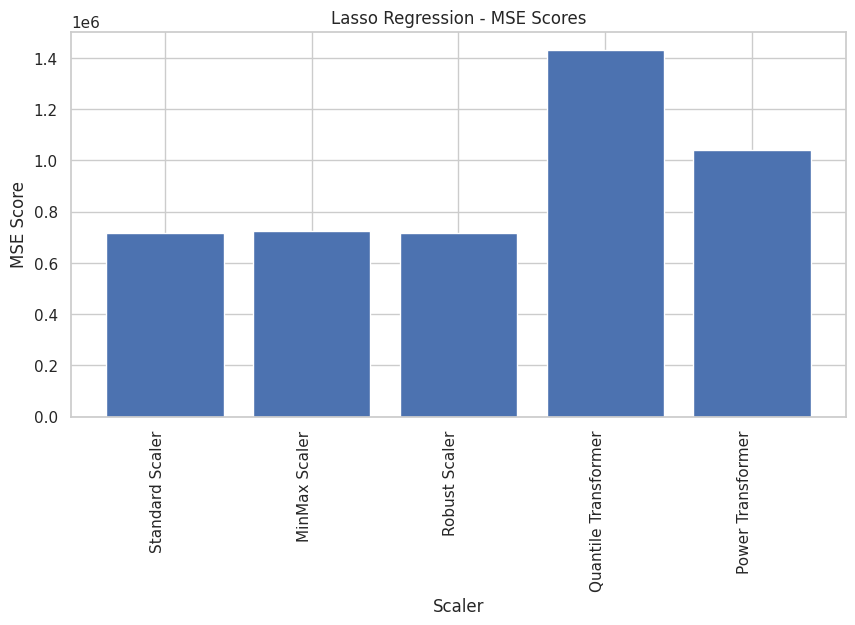

================================= RMSE =====================


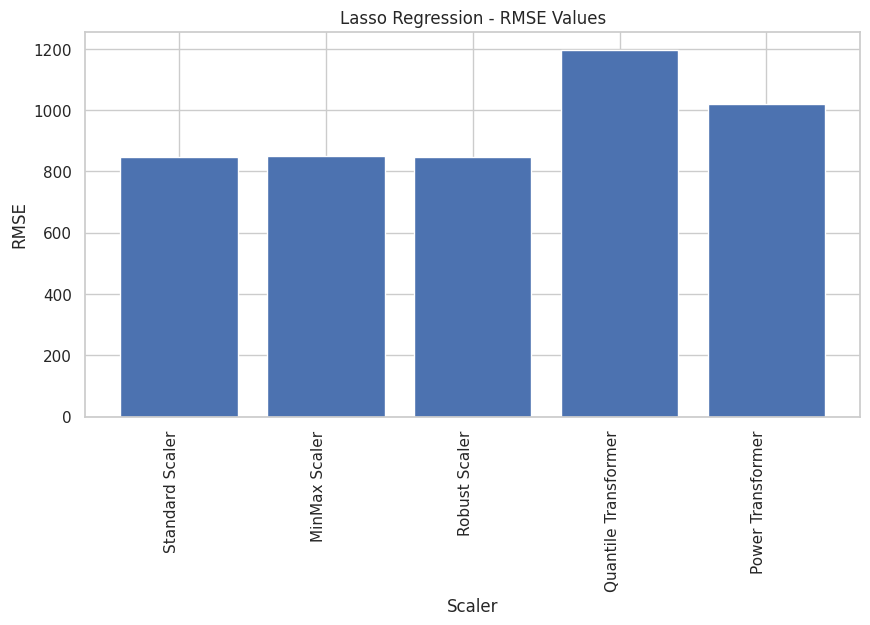

==================== Decision Tree Regression ====================
================================= R^2 =======================


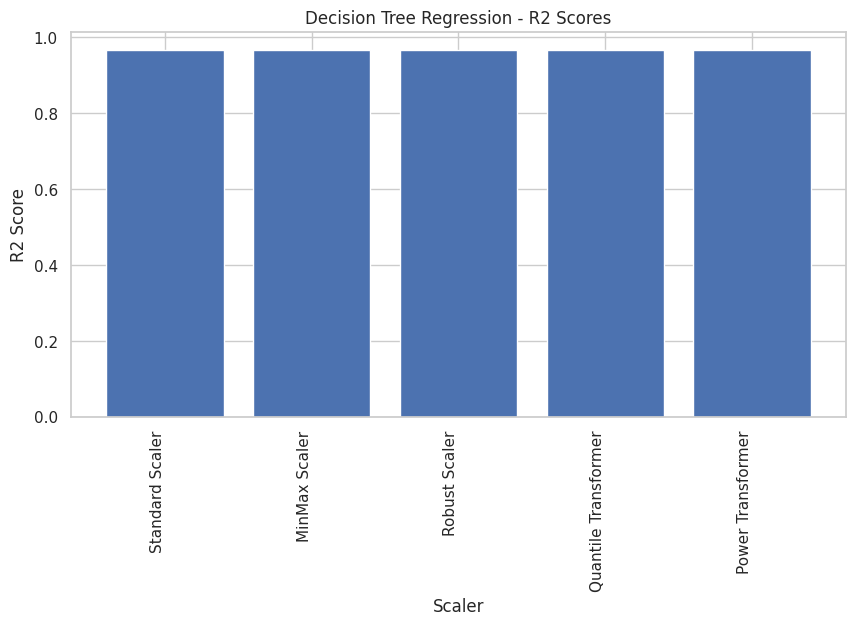

================================= MSE =======================


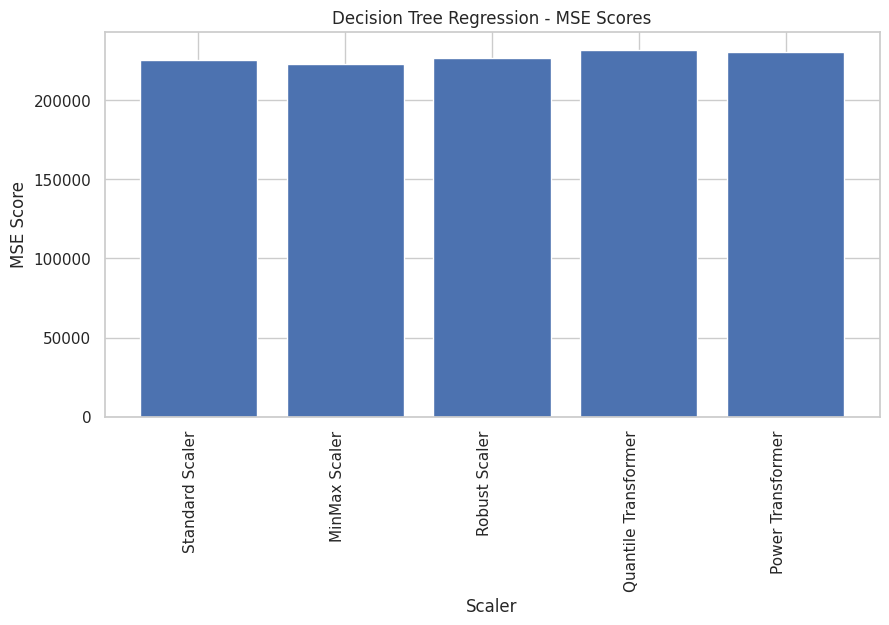

================================= RMSE =====================


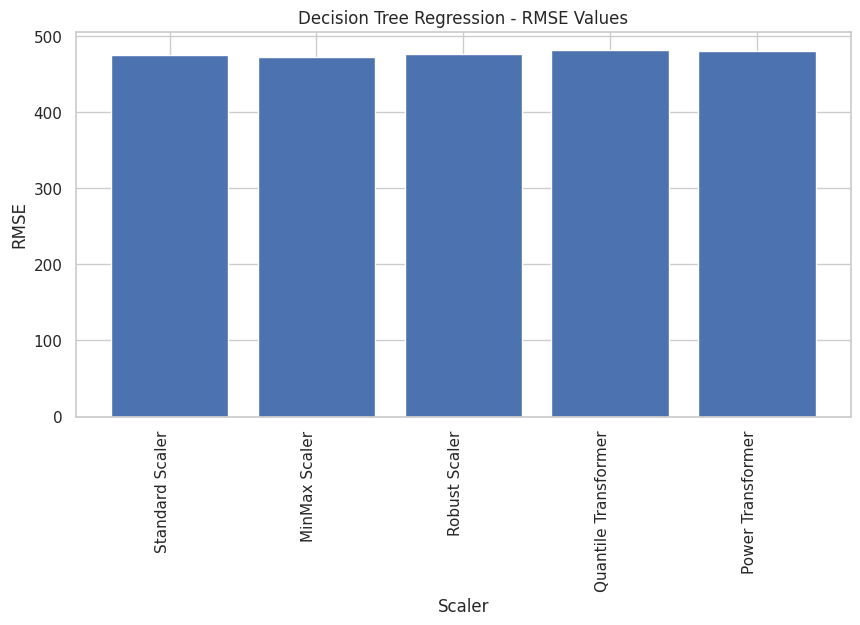

==================== Random Forest Regression ====================
================================= R^2 =======================


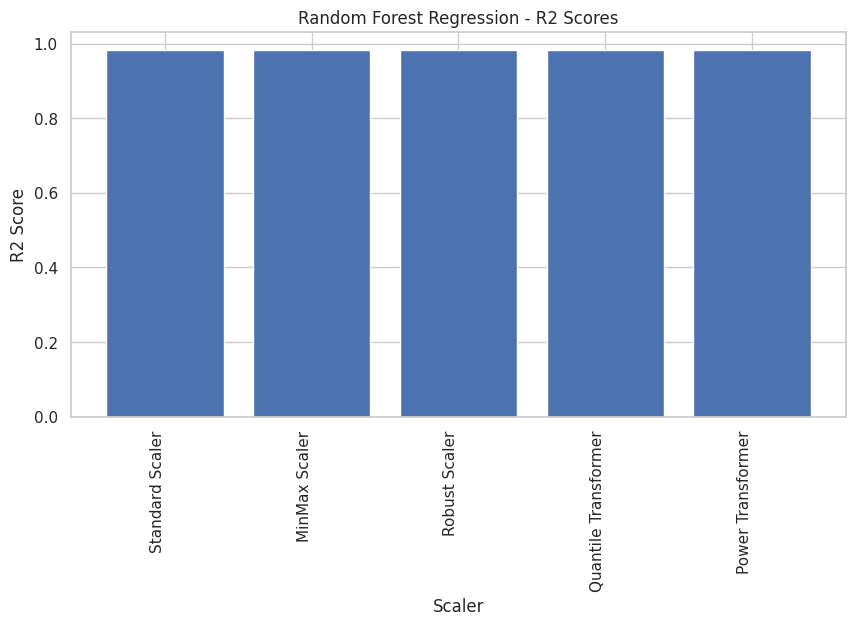

================================= MSE =======================


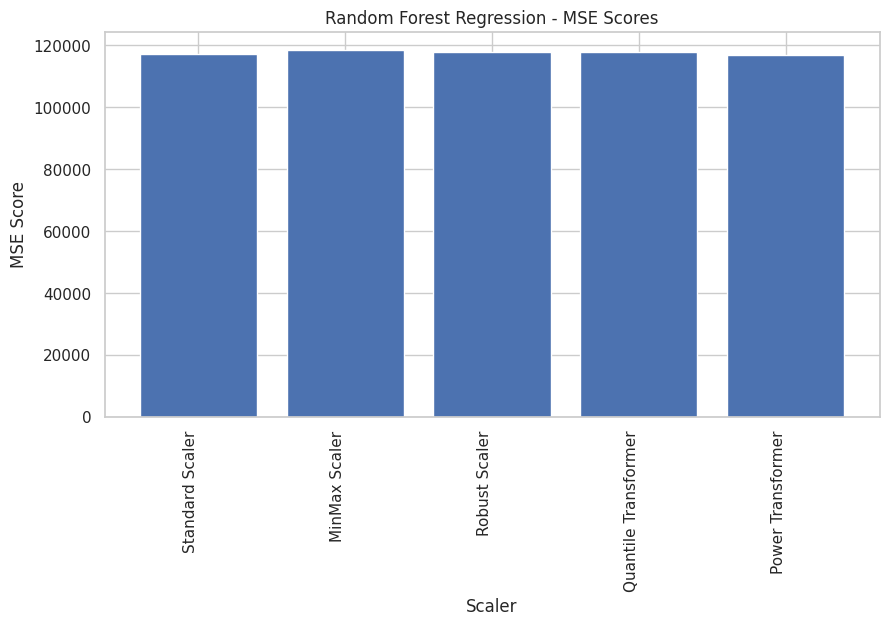

================================= RMSE =====================


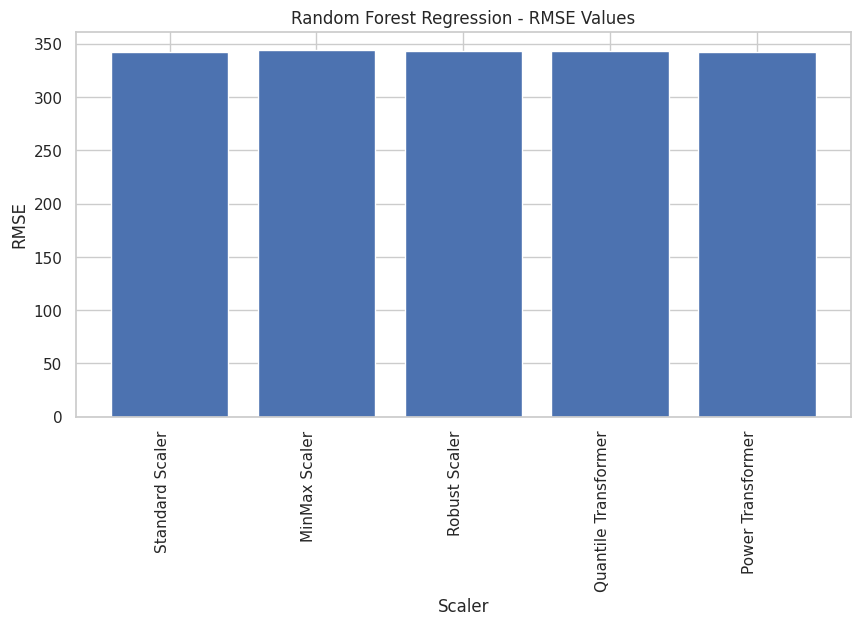

In [21]:
for regressor_name, regressor in regressors:
    df_regressor = results[results['Regressor'] == regressor_name]
    print(f"==================== {regressor_name} ====================")
    print("================================= R^2 =======================")
    plt.figure(figsize=(10, 5))
    plt.bar(df_regressor['Scaler'], df_regressor['R2'])
    plt.title(f'{regressor_name} - R2 Scores')
    plt.xlabel('Scaler')
    plt.ylabel('R2 Score')
    plt.xticks(rotation=90, ha='right')
    plt.show()
    
    print("================================= MSE =======================")
    plt.figure(figsize=(10, 5))
    plt.bar(df_regressor['Scaler'], df_regressor['MSE'])
    plt.title(f'{regressor_name} - MSE Scores')
    plt.xlabel('Scaler')
    plt.ylabel('MSE Score')
    plt.xticks(rotation=90, ha='right')
    plt.show()
    
    print("================================= RMSE =====================")
    plt.figure(figsize=(10, 5))
    plt.bar(df_regressor['Scaler'], df_regressor['RMSE'])
    plt.title(f'{regressor_name} - RMSE Values')
    plt.xlabel('Scaler')
    plt.ylabel('RMSE')
    plt.xticks(rotation=90, ha='right')
    plt.show()

In [22]:
best_r2_row         = results.loc[results['R2'].idxmax()]
best_result_mse     = results.loc[results['R2'] == best_r2_row['R2']].loc[results['MSE'].idxmin()]
best_result_rmse    = results.loc[results['R2'] == best_result_mse['R2']].loc[results['RMSE'].idxmin()]
print("\nBest Result:")
print(best_result_rmse)


Best Result:
Regressor    Random Forest Regression
Scaler              Power Transformer
R2                           0.982724
MSE                     116902.043491
RMSE                       341.909408
Name: 24, dtype: object


In [23]:
model  = Pipeline([('scaler',PowerTransformer()),('regressor',RandomForestRegressor())]).fit(X_train,Y_train)